In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
df = pd.read_excel(r'C:\Users\Rafael\Downloads\airfoil_data_to_derivate.xlsx')

In [62]:
df

,AIRFOIL_NAME,y_upper_0,y_upper_1,y_upper_2,y_upper_3,y_upper_4,y_upper_5,y_upper_6,y_upper_7,y_upper_8,...,y_lower_140,y_lower_141,y_lower_142,y_lower_143,y_lower_144,y_lower_145,y_lower_146,y_lower_147,y_lower_148,y_lower_149
0,2032c,0,0.010362,0.020215,0.026873,0.033147,0.038409,0.043670,0.048932,0.053530,...,0.005565,0.004813,0.004038,0.003232,0.002427,0.001621,0.000816,0.000011,-0.000795,-0.001600
1,a18,0,0.026027,0.032913,0.036714,0.040191,0.042811,0.045431,0.048051,0.050318,...,0.005129,0.004620,0.004078,0.003495,0.002913,0.002330,0.001748,0.001165,0.000583,0.000000
2,a18sm,0,0.010226,0.015153,0.018769,0.022109,0.024987,0.027699,0.030061,0.032422,...,0.000884,0.000430,-0.000026,-0.000485,-0.000943,-0.001390,-0.001836,-0.002261,-0.002671,-0.003060
3,a63a108c,0,0.014451,0.018651,0.021967,0.024295,0.026343,0.028128,0.029585,0.030912,...,-0.003528,-0.003136,-0.002745,-0.002356,-0.001966,-0.001574,-0.001178,-0.000789,-0.000393,0.000000
4,ag03,0,0.010594,0.015514,0.019289,0.022388,0.024998,0.027302,0.029400,0.031304,...,-0.001427,-0.001329,-0.001231,-0.001133,-0.001036,-0.000939,-0.000841,-0.000743,-0.000646,-0.000548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,wb140,0,0.010067,0.019581,0.025621,0.031203,0.035579,0.039955,0.044331,0.048175,...,-0.005624,-0.005221,-0.004849,-0.004513,-0.004178,-0.003842,-0.003507,-0.003171,-0.002836,-0.002500
1508,whitcomb,0,0.015749,0.021950,0.025226,0.028191,0.030338,0.032287,0.033951,0.035394,...,0.011640,0.010969,0.010044,0.008809,0.007574,0.006340,0.004579,0.002619,0.000660,-0.001300
1509,ys900,0,0.004257,0.006619,0.008559,0.010256,0.011753,0.013142,0.014458,0.015649,...,-0.012597,-0.011057,-0.009495,-0.007928,-0.006347,-0.004790,-0.003285,-0.001891,-0.000725,0.000000
1510,ys915,0,0.006403,0.009579,0.012180,0.014458,0.016487,0.018326,0.020065,0.021687,...,-0.004068,-0.003684,-0.003252,-0.002799,-0.002261,-0.001701,-0.001126,-0.000573,-0.000141,0.000000


In [63]:
def fourier_series_fit(x, y, n_terms):
    """Fit the given coordinates to a Fourier series with n_terms.
    
    x: x-coordinates
    y: y-coordinates
    n_terms: number of Fourier terms
    
    Returns the Fourier series coefficients.
    """
    N = len(x)
    a0 = (2.0/N) * np.sum(y)
    a = np.zeros(n_terms)
    b = np.zeros(n_terms)
    for n in range(1, n_terms+1):
        a[n-1] = (2.0/N) * np.sum(y * np.cos(2 * np.pi * n * x))
        b[n-1] = (2.0/N) * np.sum(y * np.sin(2 * np.pi * n * x))
    return a0, a, b

def fourier_series_eval(x, a0, a, b):
    """Evaluate the Fourier series at given x-coordinates.
    
    x: x-coordinates
    a0, a, b: Fourier series coefficients
    
    Returns the y-coordinates from the Fourier series.
    """
    y_approx = np.full_like(x, a0/2)
    for n in range(len(a)):
        y_approx += a[n] * np.cos(2 * np.pi * (n+1) * x) + b[n] * np.sin(2 * np.pi * (n+1) * x)
    return y_approx


In [64]:
n_terms = 20

In [65]:
new_data = []

# Iterando por cada linha
for _, row in df.iterrows():
    airfoil_name = row[0]
    y_coords = row[1:].values
    
    # Split das superfícies
    upper_y = y_coords[:150]
    lower_y = y_coords[150:]
    
    # Obtendo os coeficientes de Fourier
    a0_upper, a_upper, b_upper = fourier_series_fit(x, upper_y, n_terms)
    a0_lower, a_lower, b_lower = fourier_series_fit(x, lower_y, n_terms)
    
    # Appending
    new_row = [airfoil_name, a0_upper] + list(a_upper) + list(b_upper) + [a0_lower] + list(a_lower) + list(b_lower)
    new_data.append(new_row)

# Novo DF
columns = ['Airfoil Name'] + [f'a0_upper'] + [f'a{i}_upper' for i in range(1, n_terms + 1)] + [f'b{i}_upper' for i in range(1, n_terms + 1)] + [f'a0_lower'] + [f'a{i}_lower' for i in range(1, n_terms + 1)] + [f'b{i}_lower' for i in range(1, n_terms + 1)]
new_df = pd.DataFrame(new_data, columns=columns)


In [66]:
new_df

,Airfoil Name,a0_upper,a1_upper,a2_upper,a3_upper,a4_upper,a5_upper,a6_upper,a7_upper,a8_upper,...,b11_lower,b12_lower,b13_lower,b14_lower,b15_lower,b16_lower,b17_lower,b18_lower,b19_lower,b20_lower
0,2032c,0.137188,-0.028570,-0.011626,-0.006402,-0.003849,-0.002599,-0.001921,-0.001435,-0.001143,...,-0.000122,-0.000123,-0.000082,-0.000073,-0.000073,-0.000062,-0.000049,-0.000041,-0.000051,-0.000036
1,a18,0.121942,-0.023271,-0.007235,-0.003652,-0.002436,-0.001848,-0.001357,-0.001036,-0.000926,...,0.000249,0.000266,0.000289,0.000237,0.000245,0.000249,0.000232,0.000233,0.000229,0.000210
2,a18sm,0.100373,-0.022997,-0.007101,-0.003540,-0.002277,-0.001577,-0.001159,-0.000893,-0.000712,...,-0.000163,-0.000138,-0.000120,-0.000106,-0.000092,-0.000083,-0.000074,-0.000066,-0.000060,-0.000054
3,a63a108c,0.063139,-0.010489,-0.003289,-0.001765,-0.001162,-0.000839,-0.000661,-0.000538,-0.000454,...,-0.000299,-0.000266,-0.000238,-0.000213,-0.000192,-0.000177,-0.000165,-0.000151,-0.000131,-0.000127
4,ag03,0.067915,-0.012980,-0.004884,-0.002727,-0.001754,-0.001248,-0.000946,-0.000750,-0.000613,...,-0.000139,-0.000120,-0.000105,-0.000092,-0.000081,-0.000072,-0.000065,-0.000059,-0.000054,-0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,wb140,0.144182,-0.034890,-0.010003,-0.005812,-0.003685,-0.002238,-0.001714,-0.001413,-0.000923,...,-0.000120,-0.000092,-0.000101,-0.000114,-0.000087,-0.000079,-0.000081,-0.000077,-0.000065,-0.000059
1508,whitcomb,0.086491,-0.014849,-0.006428,-0.003582,-0.002315,-0.001652,-0.001262,-0.001013,-0.000834,...,-0.000464,-0.000395,-0.000366,-0.000308,-0.000274,-0.000244,-0.000227,-0.000216,-0.000177,-0.000168
1509,ys900,0.065790,-0.015633,-0.005903,-0.003084,-0.001785,-0.001087,-0.000700,-0.000490,-0.000381,...,-0.000120,-0.000116,-0.000110,-0.000100,-0.000087,-0.000073,-0.000063,-0.000055,-0.000050,-0.000047
1510,ys915,0.083189,-0.021274,-0.006981,-0.003015,-0.001597,-0.001112,-0.000901,-0.000722,-0.000556,...,-0.000160,-0.000145,-0.000130,-0.000114,-0.000101,-0.000093,-0.000084,-0.000076,-0.000069,-0.000063


In [67]:
new_df.to_excel("fourier_coefficients.xlsx", index=False, engine='openpyxl')

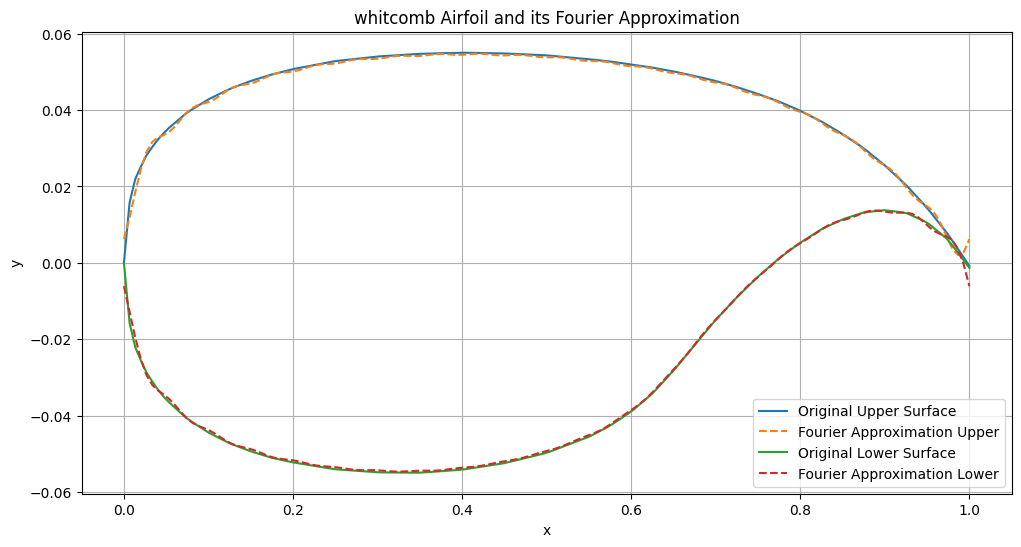

In [68]:
# Testando com o whitcomb
whitcomb_data = df[df['AIRFOIL_NAME'] == 'whitcomb'].iloc[0]
whitcomb_upper_y = whitcomb_data[1:151].values
whitcomb_lower_y = whitcomb_data[151:].values

# Pegando os coeficientes do Whitecomb
whitcomb_coeffs = new_df[new_df['Airfoil Name'] == 'whitcomb'].iloc[0]

# Usando os coeficientes pra fazer a aproximação
whitcomb_approx_upper = fourier_series_eval(x, whitcomb_coeffs['a0_upper'], whitcomb_coeffs[['a'+str(i)+'_upper' for i in range(1, n_terms+1)]].values, whitcomb_coeffs[['b'+str(i)+'_upper' for i in range(1, n_terms+1)]].values)
whitcomb_approx_lower = fourier_series_eval(x, whitcomb_coeffs['a0_lower'], whitcomb_coeffs[['a'+str(i)+'_lower' for i in range(1, n_terms+1)]].values, whitcomb_coeffs[['b'+str(i)+'_lower' for i in range(1, n_terms+1)]].values)

# Plotting the original and approximated coordinates
plt.figure(figsize=(12, 6))
plt.plot(x, whitcomb_upper_y, label='Original Upper Surface')
plt.plot(x, whitcomb_approx_upper, label='Fourier Approximation Upper', linestyle='--')
plt.plot(x, whitcomb_lower_y, label='Original Lower Surface')
plt.plot(x, whitcomb_approx_lower, label='Fourier Approximation Lower', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('whitcomb Airfoil and its Fourier Approximation')
plt.legend()
plt.grid(True)
plt.show()
